In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [2]:
def draw_line(coef,intercept, mi, ma):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[1]*
                        - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1])

# What if Data is imabalanced

<pre>
1. As a part of this task you will observe how linear models work in case of data imbalanced
2. observe how hyper plane is changs according to change in your learning rate.
3. below we have created 4 random datasets which are linearly separable and having class imbalance
4. in the first dataset the ratio between positive and negative is 100 : 2, in the 2nd data its 100:20, 
in the 3rd data its 100:40 and in 4th one its 100:80
</pre>

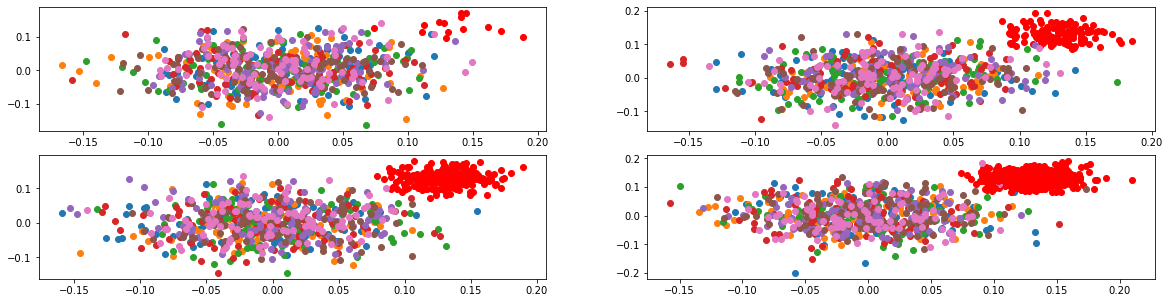

In [3]:
## here we are creating 2d imbalanced data points 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
a = 2
b= 2
plt.figure(figsize=(20,5))
for u in range(7):
    for j,i in enumerate(ratios):
        plt.subplot(a,b , j+1)
        X_p=np.random.normal(0,0.05,size=(i[0],2))
        X_n=np.random.normal(0.13,0.02,size=(i[1],2))
        y_p=np.array([1]*i[0]).reshape(-1,1)
        y_n=np.array([0]*i[1]).reshape(-1,1)
        X=np.vstack((X_p,X_n))
        y=np.vstack((y_p,y_n))
        plt.scatter(X_p[:,0],X_p[:,1])
        plt.scatter(X_n[:,0],X_n[:,1],color='red')
plt.show()

> your task is to apply SVM (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC'>sklearn.svm.SVC</a>) and LR (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>sklearn.linear_model.LogisticRegression</a>) with different regularization strength [0.001, 1, 100]

## Task 1: Applying SVM

<pre>1. you need to create a grid of plots like this</pre>
<img src='https://i.imgur.com/TOmRwL3.png'> 
<pre>
in each of the cell[i][j] you will be drawing the hyper plane that you get after applying <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">SVM</a> on ith dataset and 
        jth learnig rate 

i.e 
<table>
    <tr><td>Plane(SVM().fit(D1, C=0.001))</td><td>Plane(SVM().fit(D1, C=1))</td><td>Plane(SVM().fit(D1, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D2, C=0.001))</td><td>Plane(SVM().fit(D2, C=1))</td><td>Plane(SVM().fit(D2, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D3, C=0.001))</td><td>Plane(SVM().fit(D3, C=1))</td><td>Plane(SVM().fit(D3, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D4, C=0.001))</td><td>Plane(SVM().fit(D4, C=1))</td><td>Plane(SVM().fit(D4, C=100))</td></tr>
</table>

if you can do, you can represent the support vectors in different colors, 
which will help us understand the position of hyper plane 


<font color='red'> <h3> Write in your own words, the observations from the above plots, and 
what do you think about the position of the hyper plane </h3> </font>

check the optimization problem here https://scikit-learn.org/stable/modules/svm.html#mathematical-formulation

if you can describe your understanding by writing it on a paper 
and attach the picture, or record a video upload it in assignment. 
</pre>

## Task 2: Applying LR

<pre> you will do the same thing what you have done in task 1.1, except instead of SVM you apply <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>logistic regression </a>

<pre>these are results we got when we are experimenting with one of the model </pre>
<img src='https://i.imgur.com/vLXTxjY.png'>

In [4]:
#you can start writing code here.
import numpy as np

def create_dataSet(ratio):
    
    #positive class data point with feature 2
    
    x_positive = np.random.normal(0,0.05,size =(ratio[0],2))
    
    #negative class point with 2 feature 
    
    x_negative = np.random.normal(0.13,0.02, size = (ratio[1],2))
    
    y_positive_c = np.array([1] * ratio[0]).reshape(-1,1)
    
    y_negative_c = np.array([0] * ratio[1]).reshape(-1,1)
    
    #merge the positive and negative class label
    
    X = np.vstack((x_positive,x_negative))
    
    
    Y= np.vstack((y_positive_c,y_negative_c))
    
    
    return (X,Y)


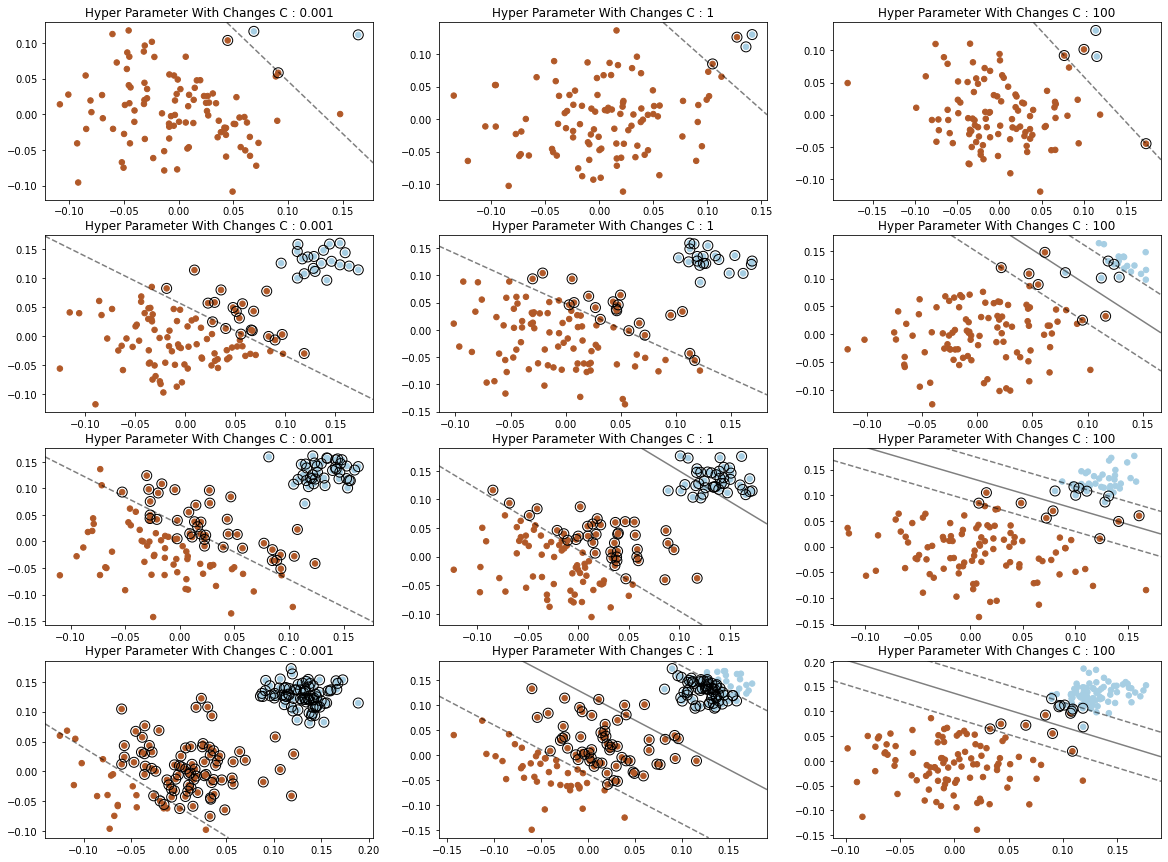

In [5]:
#C is a Hyper parameter C = [0.001,1,100] in Logistic Regression c is inversely Propotional to lambda
#Reference: https://www.kaggle.com/asimislam/tutorial-python-subplots
CList= [0.001,1,100]

ratios = [(100,2), (100, 20), (100, 40), (100, 80)]

fig = plt.figure(figsize=(20,15))


counter = 1

for dataset in ratios:
    
    
    for c in CList:
        
        #create the data set with given points
        X,y = create_dataSet(dataset) 
        
        #print(X.shape)

        #Support Vector machine with linear Kernal
        svc = SVC(C = c,kernel = 'linear').fit(X,y)
        
        
        plt.subplot(len(ratios),len(CList),counter)
        #https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
        
        
        #draw the subplots iteratively
        plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
        
       
        ax = plt.gca()
        
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        # create grid to evaluate model
        xx = np.linspace(xlim[0], xlim[1], 30)
        
        yy = np.linspace(ylim[0], ylim[1], 30)
        
        YY, XX = np.meshgrid(yy, xx)
        
        xy = np.vstack([XX.ravel(), YY.ravel()]).T
        
        Z = svc.decision_function(xy).reshape(XX.shape)

        # plot decision boundary and margins
        ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                   linestyles=['--', '-', '--'])
        # plot support vectors
        ax.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=100,
                   linewidth=1, facecolors='none', edgecolors='k')
        
        plt.title('Hyper Parameter With Changes C : {0}'.format(c))
        counter += 1
plt.show()
    


## Logistic Regression With HyperParameter 

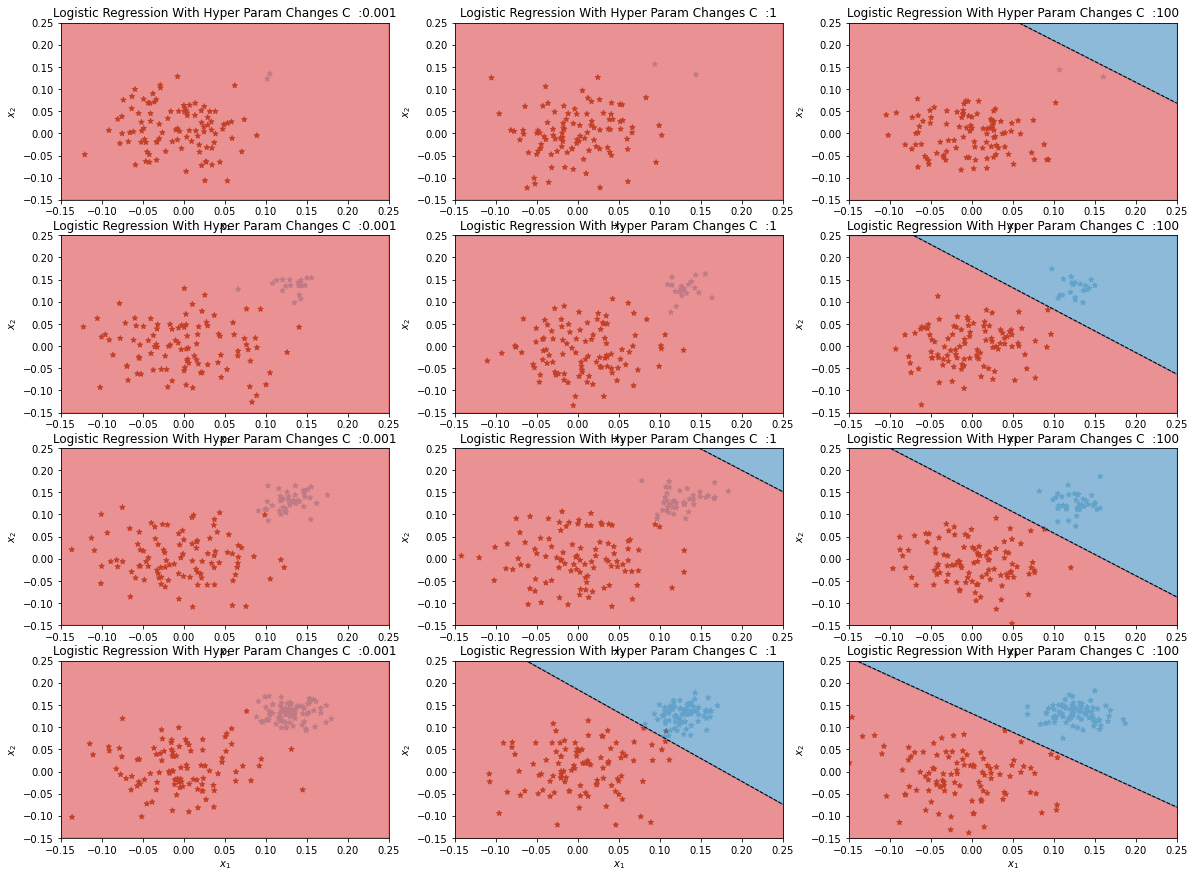

In [14]:
#Credit : https://scipython.com/blog/plotting-the-decision-boundary-of-a-logistic-regression-model/
from sklearn.linear_model import LogisticRegression
datasets = [(100,2), (100, 20), (100, 40), (100, 80)]
hyperparamList = [0.001,1,100]
row = len(datasets)

column = len(hyperparamList)

counter = 1

fig = plt.figure(figsize=(20,15))

#create a dataset
for data in datasets:
    
    for c in hyperparamList:
        
        #create a dataset
        X,y = create_dataSet(data)
        
        #c is nothing but 1 / lambda
        logistic = LogisticRegression(C = c)
        
        logistic.fit(X,y)
        
        plt.subplot(row,column,counter)
    
        
        b = logistic.intercept_[0]
        
        w1, w2 = logistic.coef_.T
        
        # Calculate the intercept and gradient of the decision boundary.
        constant= -b/w2
        
        m = -w1/w2

        # Plot the data and the classification with the decision boundary.
        xmin, xmax = -0.15, 0.25
        
        ymin, ymax = -0.15, 0.25
        
        xd = np.array([xmin, xmax])
        
        yd = m*xd + constant
        
        #this line plot the point in the x-axis and y-axis
        plt.scatter(X[:,0] , X[:,1] , c = y,s=30,marker = '*' ,cmap=plt.cm.Paired)
        
        plt.plot(xd, yd, 'k', lw=1, ls='--')
        
        plt.fill_between(xd, yd, ymin, color='tab:red',alpha = 0.5)
        
        plt.fill_between(xd, yd, ymax, color='tab:blue', alpha=0.5)
        plt.xlim(xmin, xmax)
        plt.ylim(ymin, ymax)
        plt.ylabel(r'$x_2$')
        plt.xlabel(r'$x_1$')
        plt.title('Logistic Regression With Hyper Param Changes C  :{0}'.format(c))
       
        counter += 1

plt.show()
        


#### Obervation : Note: I have Added My Obervation in the pdf File.please find my Observation in this pdf file
https://drive.google.com/file/d/1GnNgfaTBmLv5N1uC3sKyKyak62dMMxUC/view?usp=sharing